## Machine learnig - Prevendo preço das ações com Python

In [205]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
plt.rcParams['figure.figsize'] = (18,8)

In [206]:
# data_inico = '2018-01-01'
# data_fim = '2021-01-01'
# df = data.DataReader('itub3.sa', 'yahoo', data_inico, data_fim)

path = '../data/Dados Históricos Total - Ibovespa.csv'
df = pd.read_csv(path)
df['Data'] = pd.to_datetime(df['Data'], format='%d.%m.%Y')
df.set_index('Data', inplace=True)


In [207]:
#criando novos campos de medias móveis
df['mm7'] = df['Último'].rolling(7).mean()
df['mm21d'] = df['Último'].rolling(21).mean()

In [208]:
# vou colar um dia pra frente  o df pq se naão eu vou ver o valor da previção já dado,
#ou seja vou rodar o modelo já sabendo o valor kkkk
df['Último'] = df['Último'].shift(-1)
df.head()

,Último,Abertura,Máxima,Mínima,Vol.,Var%,mm7,mm21d
Data,,,,,,,,
2023-08-07,119.508,119.509,120.104,118.894,"8,73M","-0,11%",NaN,NaN
2023-08-04,120.586,120.586,121.442,119.215,"15,07M","-0,89%",NaN,NaN
2023-08-03,120.859,120.859,122.619,120.365,"13,03M","-0,23%",NaN,NaN
2023-08-02,121.248,121.249,121.252,119.798,"10,57M","-0,32%",NaN,NaN
2023-08-01,121.943,121.945,121.945,120.154,"10,30M","-0,57%",NaN,NaN


In [209]:
# vamos apagar os dados nulos pq o modelo não vai ler essas infos NaN
df.dropna(inplace=True)
df

,Último,Abertura,Máxima,Mínima,Vol.,Var%,mm7,mm21d
Data,,,,,,,,
2023-07-10,118.898,118.897,118.897,117.814,"8,10M","-0,80%",117.980429,119.586952
2023-07-07,117.426,117.427,119.549,117.427,"10,52M","1,25%",118.131429,119.564000
2023-07-06,119.549,119.548,119.548,117.096,"11,03M","-1,78%",118.018143,119.464857
2023-07-05,119.076,119.072,120.200,118.688,"10,96M","0,40%",118.280714,119.415476
2023-07-04,119.673,119.673,119.678,118.830,"6,56M","-0,50%",118.253857,119.330571
...,...,...,...,...,...,...,...,...
2019-01-14,93.658,93.645,94.474,93.335,"4,63M","0,87%",95.069143,95.948524
2019-01-11,93.806,93.806,93.961,93.359,"5,50M","-0,16%",94.862714,95.829000
2019-01-10,93.613,93.599,93.987,93.050,"4,99M","0,21%",94.547857,95.800095


In [210]:
#verificando quantidade de linhas
qtd_linhas = len(df)

qtd_linhas_treino= round(.50 * qtd_linhas)
qtd_linhas_teste= 300 
qtd_linhas_validacao = qtd_linhas -1

info = (
    f"linhas treino= 0:{qtd_linhas_treino}"
    f" linhas teste= {qtd_linhas_treino}:{qtd_linhas_treino + qtd_linhas_teste -1}"
    f" linhas validação= {qtd_linhas_validacao}"
)

info

'linhas treino= 0:560 linhas teste= 560:859 linhas validação= 1119'

In [211]:
df["data_pregao"] = df.index
df

,Último,Abertura,Máxima,Mínima,Vol.,Var%,mm7,mm21d,data_pregao
Data,,,,,,,,,
2023-07-10,118.898,118.897,118.897,117.814,"8,10M","-0,80%",117.980429,119.586952,2023-07-10
2023-07-07,117.426,117.427,119.549,117.427,"10,52M","1,25%",118.131429,119.564000,2023-07-07
2023-07-06,119.549,119.548,119.548,117.096,"11,03M","-1,78%",118.018143,119.464857,2023-07-06
2023-07-05,119.076,119.072,120.200,118.688,"10,96M","0,40%",118.280714,119.415476,2023-07-05
2023-07-04,119.673,119.673,119.678,118.830,"6,56M","-0,50%",118.253857,119.330571,2023-07-04
...,...,...,...,...,...,...,...,...,...
2019-01-14,93.658,93.645,94.474,93.335,"4,63M","0,87%",95.069143,95.948524,2019-01-14
2019-01-11,93.806,93.806,93.961,93.359,"5,50M","-0,16%",94.862714,95.829000,2019-01-11
2019-01-10,93.613,93.599,93.987,93.050,"4,99M","0,21%",94.547857,95.800095,2019-01-10


In [212]:
#reindexando o data frame
df = df.reset_index(drop=True)
df

,Último,Abertura,Máxima,Mínima,Vol.,Var%,mm7,mm21d,data_pregao
0,118.898,118.897,118.897,117.814,"8,10M","-0,80%",117.980429,119.586952,2023-07-10
1,117.426,117.427,119.549,117.427,"10,52M","1,25%",118.131429,119.564000,2023-07-07
2,119.549,119.548,119.548,117.096,"11,03M","-1,78%",118.018143,119.464857,2023-07-06
3,119.076,119.072,120.200,118.688,"10,96M","0,40%",118.280714,119.415476,2023-07-05
4,119.673,119.673,119.678,118.830,"6,56M","-0,50%",118.253857,119.330571,2023-07-04
...,...,...,...,...,...,...,...,...,...
1115,93.658,93.645,94.474,93.335,"4,63M","0,87%",95.069143,95.948524,2019-01-14
1116,93.806,93.806,93.961,93.359,"5,50M","-0,16%",94.862714,95.829000,2019-01-11
1117,93.613,93.599,93.987,93.050,"4,99M","0,21%",94.547857,95.800095,2019-01-10
1118,92.032,92.033,93.626,92.028,"5,17M","1,72%",94.193000,95.717714,2019-01-09


In [213]:
df_completo = df

In [214]:
#column Vol. when have M multiply by 1000000 and when have K multiply by 1000
#change , to . in column Vol.
df['Vol.'] = df['Vol.'].apply(lambda x: x.replace(',','.'))
df['Vol.'] = df['Vol.'].apply(lambda x: float(x[:-1]) if x[-1] == 'M' else float(x[:-1])*1000000 if x[-1] == 'K' else float(x[:-1])*1000)

In [215]:
df

,Último,Abertura,Máxima,Mínima,Vol.,Var%,mm7,mm21d,data_pregao
0,118.898,118.897,118.897,117.814,8.10,"-0,80%",117.980429,119.586952,2023-07-10
1,117.426,117.427,119.549,117.427,10.52,"1,25%",118.131429,119.564000,2023-07-07
2,119.549,119.548,119.548,117.096,11.03,"-1,78%",118.018143,119.464857,2023-07-06
3,119.076,119.072,120.200,118.688,10.96,"0,40%",118.280714,119.415476,2023-07-05
4,119.673,119.673,119.678,118.830,6.56,"-0,50%",118.253857,119.330571,2023-07-04
...,...,...,...,...,...,...,...,...,...
1115,93.658,93.645,94.474,93.335,4.63,"0,87%",95.069143,95.948524,2019-01-14
1116,93.806,93.806,93.961,93.359,5.50,"-0,16%",94.862714,95.829000,2019-01-11
1117,93.613,93.599,93.987,93.050,4.99,"0,21%",94.547857,95.800095,2019-01-10
1118,92.032,92.033,93.626,92.028,5.17,"1,72%",94.193000,95.717714,2019-01-09


In [216]:
#separando as features e labels drop Último	Abertura	Máxima	Mínima
features = df.drop(labels=['Último', 'Abertura', 'Máxima', 'Mínima', 'data_pregao', 'Var%'], axis=1)
labels = df['Último']

In [217]:
features.columns.to_list()

['Vol.', 'mm7', 'mm21d']

In [218]:
#Agora vamos escolher as melhores variaveis para da nossa base de dados com Kbest

from sklearn.feature_selection import SelectKBest
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import MinMaxScaler
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score
##################################################################################

features_list = features.columns.to_list()

k_best_features = SelectKBest(k='all')
k_best_features.fit_transform(features, labels)
k_best_features_scores = k_best_features.scores_
raw_pairs = zip(features_list[1:], k_best_features_scores)
ordered_pairs = list(reversed(sorted(raw_pairs, key=lambda x: x[1])))

k_best_features_final = dict(ordered_pairs[:15])
best_features = k_best_features_final.keys()
print ('')
print ("Melhores features:")
print (k_best_features_final)


Melhores features:
{'mm7': 7469071789214.745, 'mm21d': 24.57077199007866}


In [219]:

#Separa os dados de treino teste e validação
X_train = features[:qtd_linhas_treino]
X_test = features[qtd_linhas_treino:qtd_linhas_treino + qtd_linhas_teste -1]

y_train = labels[:qtd_linhas_treino]
y_test = labels[qtd_linhas_treino:qtd_linhas_treino + qtd_linhas_teste -1]

print( len(X_train), len(y_train))

print( len(X_test), len(y_test))

560 560
299 299


In [220]:
# Normalizando os dados de entrada(features)

# Gerando o novo padrão
scaler = MinMaxScaler()
X_train_scale = scaler.fit_transform(X_train)  # Normalizando os dados de entrada(treinamento)
X_test_scale  = scaler.transform(X_test)       # Normalizando os dados de entrada(teste)

In [221]:
#treinamento usando regressão linear
lr = linear_model.LinearRegression()
lr.fit(X_train_scale, y_train)
pred= lr.predict(X_test_scale)
cd =r2_score(y_test, pred)

f'Coeficiente de determinação:{cd * 100:.2f}'

'Coeficiente de determinação:94.06'

In [222]:
numero_dados = 230 # 58

In [223]:
valor_novo = features.head(numero_dados)
valor_novo

,Vol.,mm7,mm21d
0,8.10,117.980429,119.586952
1,10.52,118.131429,119.564000
2,11.03,118.018143,119.464857
3,10.96,118.280714,119.415476
4,6.56,118.253857,119.330571
...,...,...,...
225,18.70,112.689429,111.978476
226,14.94,112.577571,111.802810
227,13.38,112.397571,111.704524
228,12.15,111.660143,111.644286


In [224]:
#executando a previsão
previsao=scaler.transform(valor_novo)
pred=lr.predict(previsao)

pred

array([117.62310844, 117.4559416 , 117.27085006, 117.62011342,
       118.26830648, 118.29485513, 117.7728658 , 118.28792107,
       118.00703975, 117.73604337, 117.95134044, 117.61265638,
       117.653199  , 118.04319431, 118.35315864, 119.49952983,
       118.44787318, 119.03724889, 118.36538067, 118.67060693,
       118.18094167, 117.511248  , 116.71870842, 115.8791308 ,
       115.71649348, 113.85090812, 112.87853766, 111.25916655,
       110.61501152, 110.64601745, 109.32977287, 108.42904757,
       108.17990257, 108.2965725 , 108.86013406, 108.65250239,
       109.13239895, 108.95735354, 108.35799491, 109.33455311,
       109.15017354, 108.81196773, 108.25094797, 107.85381318,
       107.41761659, 106.47954651, 105.70148356, 105.12494878,
       104.05517814, 103.4311741 , 103.06823872, 102.71298732,
       102.36188705, 102.73474135, 103.05432109, 103.44715767,
       104.04243005, 104.78995197, 105.34895298, 105.84329941,
       105.62301276, 105.77571097, 107.08119218, 105.98

In [225]:
data_pregao_full=df_completo['data_pregao']
data_pregao=data_pregao_full.head(numero_dados)

res_full=df_completo['Último']
res=res_full.head(numero_dados)

#change data_pregao to datetime
data_pregao=pd.to_datetime(data_pregao)

df=pd.DataFrame({'data_pregao':data_pregao, 'real':res, 'previsao':pred})


df.set_index('data_pregao', inplace=True)

df.head()

,real,previsao
data_pregao,,
2023-07-10,118.898,117.623108
2023-07-07,117.426,117.455942
2023-07-06,119.549,117.270850
2023-07-05,119.076,117.620113
2023-07-04,119.673,118.268306


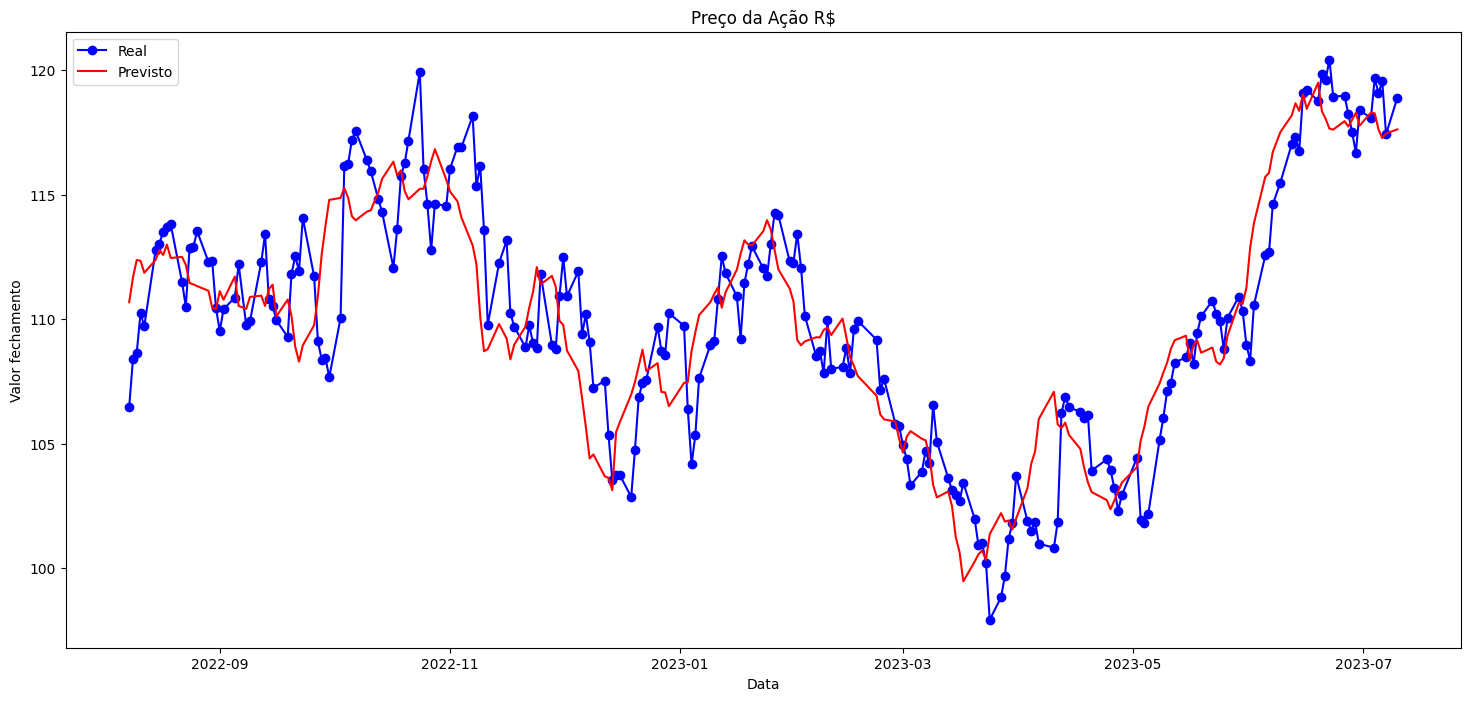

In [226]:
#plotagem
plt.title("Preço da Ação R$")
plt.plot(df["real"],label = "Real", color = "blue", marker = 'o')
plt.plot(df["previsao"],label = "Previsto", color = "red")
plt.xlabel("Data")
plt.ylabel("Valor fechamento")
plt.legend()

In [227]:
for index, row in df.iterrows():
    df.loc[index,'diferenca'] = (df.loc[index,'real'] - df.loc[index,'previsao']);

In [228]:
df.head()

,real,previsao,diferenca
data_pregao,,,
2023-07-10,118.898,117.623108,1.274892
2023-07-07,117.426,117.455942,-0.029942
2023-07-06,119.549,117.270850,2.278150
2023-07-05,119.076,117.620113,1.455887
2023-07-04,119.673,118.268306,1.404694
